In [1]:
# STEP 1: Import Required Libraries
!pip install pandas plotly dash
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")


In [2]:
# STEP 2: Load the Dataset
df = pd.read_csv('coffee sales dataset.csv')
print("Initial Shape:", df.shape)
df.head()


Initial Shape: (1133, 6)


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [4]:
# Convert date columns
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

In [5]:
# Create extra time features
df['month'] = df['date'].dt.to_period('M').astype(str)
df['day'] = df['date'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

In [6]:
# Define coffee color palette
coffee_colors = ["#4B3832", "#854442", "#FFF4E6", "#3C2F2F", "#BE9B7B", "#A9746E"]

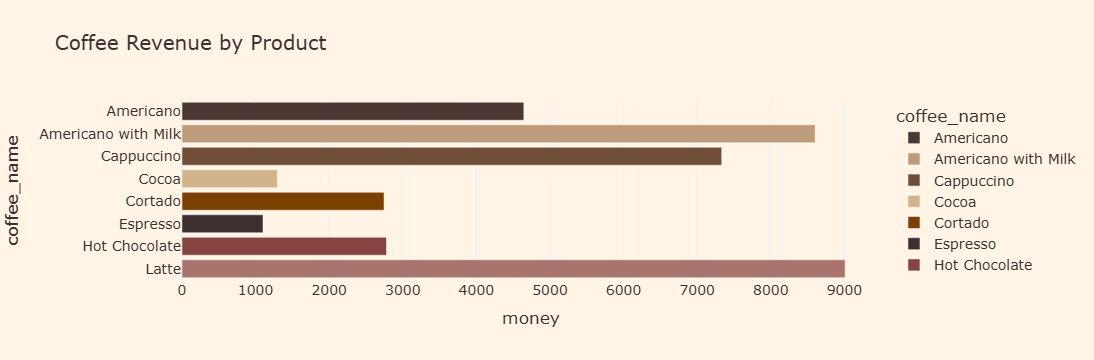

In [7]:
# Define manual coffee color mapping
coffee_color_map = {
    "Latte": "#A9746E",          # Mocha
    "Americano": "#4B3832",      # Dark roast
    "Americano with Milk": "#BE9B7B",
    "Cappuccino": "#6F4E37",     # Rich coffee brown (new, darker!)
    "Espresso": "#3C2F2F",
    "Hot Chocolate": "#854442",
    "Cocoa": "#D2B48C",          # Light tan
    "Cortado": "#7B3F00"         # Strong espresso brown
}

# --- Plot 1: Coffee Sales by Type ---
fig1 = px.bar(
    df.groupby("coffee_name")["money"].sum().reset_index(),
    x="money", y="coffee_name",
    orientation="h",
    color="coffee_name",
    color_discrete_map=coffee_color_map,  # <-- Manual mapping
    title=" Coffee Revenue by Product"
    )

fig1.update_layout(
    template="plotly_white",
    plot_bgcolor="#FFF4E6",
    paper_bgcolor="#FFF4E6",
    font=dict(color="#3C2F2F", size=14)
)

fig1.show()


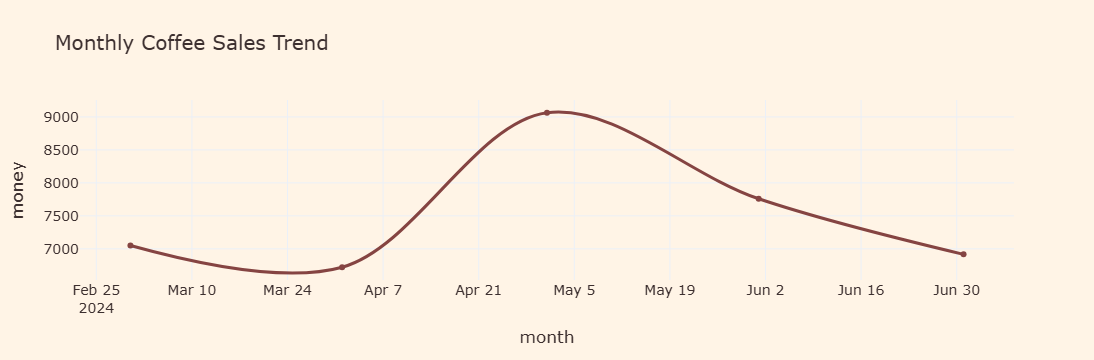

In [8]:
# --- Plot 2: Monthly Sales Trend ---
fig2 = px.line(
    df.groupby("month")["money"].sum().reset_index(),
    x="month", y="money",
    markers=True,
    title=" Monthly Coffee Sales Trend",
    line_shape="spline"
)
fig2.update_traces(line=dict(color="#854442", width=3))
fig2.update_layout(
    template="plotly_white",
    plot_bgcolor="#FFF4E6",
    paper_bgcolor="#FFF4E6",
    font=dict(color="#3C2F2F", size=14)
)

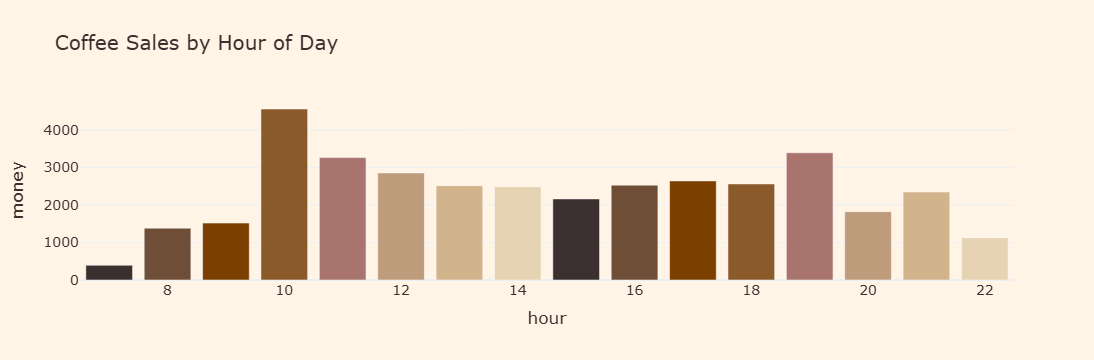

In [9]:
# Define a coffee color palette (dark → light)
coffee_palette = [
    "#3C2F2F",  # Espresso
    "#6F4E37",  # Cappuccino
    "#7B3F00",  # Mocha
    "#8B5A2B",  # Caramel
    "#A9746E",  # Latte
    "#BE9B7B",  # Coffee with milk
    "#D2B48C",  # Macchiato
    "#E6D3B3"   # Cream
]

# --- Plot 3: Hourly Sales Pattern (Coffee colors only) ---
hourly_sales = df.groupby("hour")["money"].sum().reset_index()

fig3 = px.bar(
    hourly_sales,
    x="hour", y="money",
    title=" Coffee Sales by Hour of Day",
    color=hourly_sales["hour"].astype(str),  # treat hour as category
    color_discrete_sequence=coffee_palette   # fixed coffee palette
)
fig3.update_layout(
    template="plotly_white",
    plot_bgcolor="#FFF4E6",
    paper_bgcolor="#FFF4E6",
    font=dict(color="#3C2F2F", size=14),
    showlegend=False
)

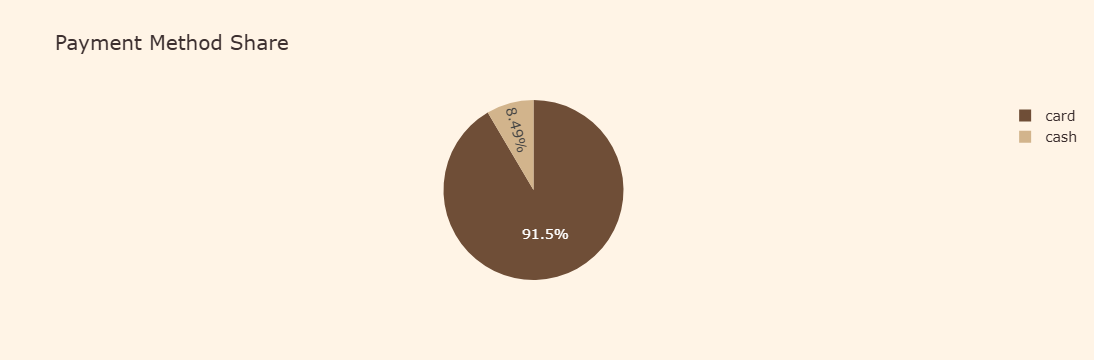

In [10]:
#  4: Payment Type Share
payment_share = df.groupby("cash_type")["money"].sum().reset_index()

fig4 = px.pie(
    payment_share,
    names="cash_type", values="money",
    title=" Payment Method Share",
    color="cash_type",
    color_discrete_map={"card": "#6F4E37", "cash": "#D2B48C"}  # coffee shades
)

fig4.update_layout(
    template="plotly_white",
    paper_bgcolor="#FFF4E6",
    font=dict(color="#3C2F2F", size=14)
)
fig4.show()

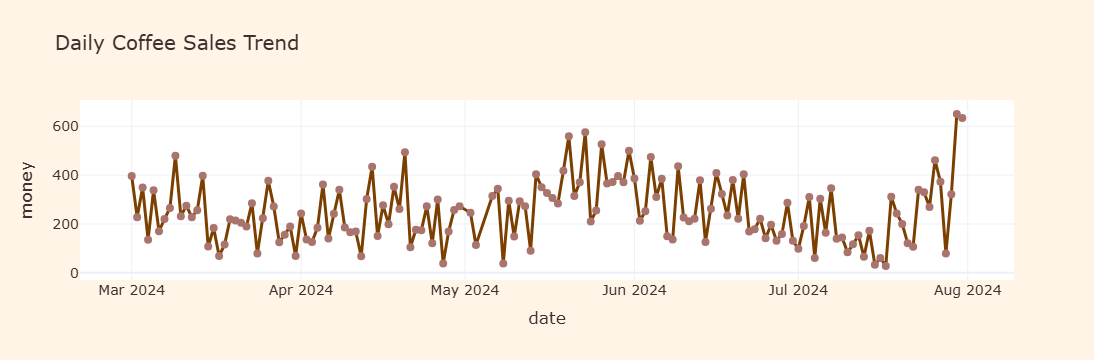

In [11]:
#  Plot 5: Daily Sales Trend
daily_sales = df.groupby("date")["money"].sum().reset_index()

fig5 = px.line(
    daily_sales,
    x="date", y="money",
    title=" Daily Coffee Sales Trend",
    markers=True
)
fig5.update_traces(line=dict(color="#7B3F00", width=3), marker=dict(color="#A9746E", size=8))
fig5.update_layout(
    template="plotly_white",
    paper_bgcolor="#FFF4E6",
    font=dict(color="#3C2F2F", size=14)
)
fig5.show()

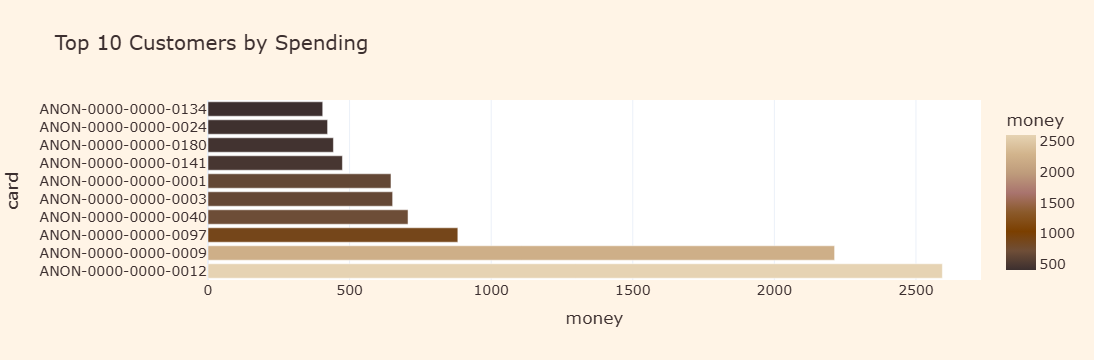

In [12]:
# Plot 6: Top Customers
top_customers = df.groupby("card")["money"].sum().reset_index().sort_values(by="money", ascending=False).head(10)

fig6 = px.bar(
    top_customers,
    x="money", y="card",
    orientation="h",
    title=" Top 10 Customers by Spending",
    color="money",
    color_continuous_scale=coffee_palette
)

fig6.update_layout(
    template="plotly_white",
    paper_bgcolor="#FFF4E6",
    font=dict(color="#3C2F2F", size=14)
)
fig6.show()

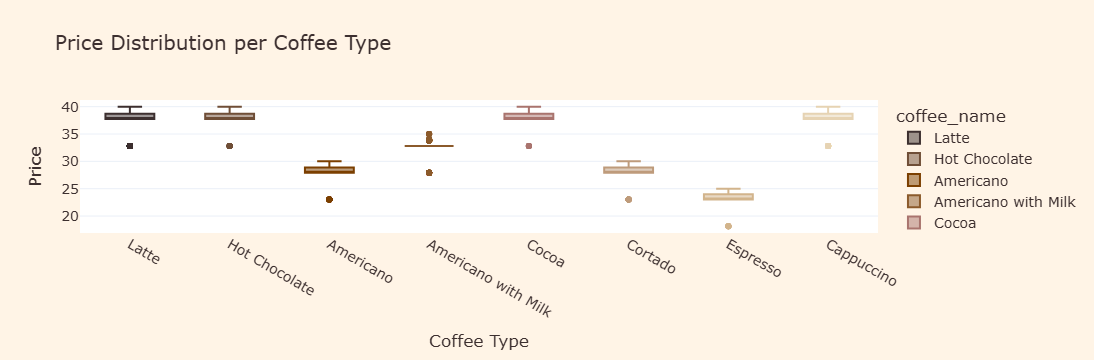

In [13]:
#  Plot 8: Price Distribution
fig8 = px.box(
    df,
    x="coffee_name", y="money",
    title=" Price Distribution per Coffee Type",
    color="coffee_name",
    color_discrete_sequence=coffee_palette
)

fig8.update_layout(
    template="plotly_white",
    paper_bgcolor="#FFF4E6",
    font=dict(color="#3C2F2F", size=14),
    xaxis_title="Coffee Type",
    yaxis_title="Price"
)
fig8.show()